#  <span style="color:Black">Intrinsic dimension, $\mathcal{D}_{\text{int}}$, across MBL phase-transition</span>
<img src="figures/2nn_many_L14.png"
     alt="Markdown Monster icon"
     style="float: right; margin-right: 100px;"
     width="50%"/>
This notebook contains dimension analysis of the many-body localization (MBL) transition via two-nearest-neighbours (2NN). The notebook is split into parts as delineated in the contents section below.

1. **Generating data**
1. **Weight distribution within eigenvectors**
1. **2NN**
    1. Single
    1. Many
    1. Average
    1. Scaling collapse
1. **Data from Cluster**
    1. Many
    1. Scaling collapse

In [1]:
# packages
import numpy as np  # matrix and vector operations
import matplotlib.pyplot as plt  # visualization
import fssa as fssa  # scaling collapse 
from utils import *  # all things ID of MBL
from time import time
from plotting import *

## 1. Generating data

In [2]:
Ls, num_seeds, location_raw = [6,8,10], 20, 'data/raw/'

min_disorder, max_disorder, steps = 0.5, 5.5, 11
ws=np.linspace(min_disorder, max_disorder, steps)

#[buildDiagSave(L, num_seeds, ws, location = location_raw) for L in Ls]
'''to generate data: uncomment the line above ☝️'''

'to generate data: uncomment the line above ☝️'

## 2. EigenComponent Dominance
We may investigate whether there is a change in intrinsic dimension across the phase transition by looking at the weight distribution within eigenvectors. A decrease in intrinsic dimension is indicated by a consolidation of weight in an eigenvector.

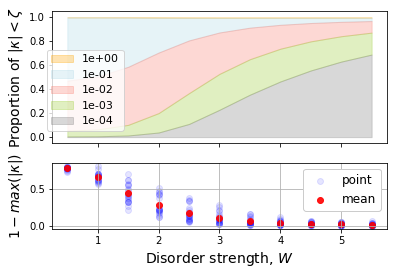

In [27]:
#maxs, below_lims, lims = eigenC_analysis(ws, num_lims=5, num_seeds=num_seeds, L = Ls[-1], location=location_raw)
file = np.load('data/eigC/eigC_L14_s_20.npz', allow_pickle=True)
maxs, below_lims, lims = file[file.files[0]]

plot_eigencomponentDominance(below_lims, maxs.T, ws, lims, num_seeds=num_seeds)
#filename_fig = 'figures/EigCDom-L{}-seeds{}-ws{}.png'.format(L,num_seeds,len(ws))
#plt.savefig(filename_fig, dpi=500, bbox_inches='tight')

## 3. 2NN
2NN is a neighbour graph algo. which determines the intrinsic dimension of a dataset -- when applied to a list of eigenvectors corresponding to one realization of a single disorder strength.

### A. Single

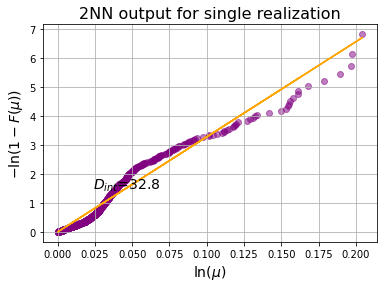

In [29]:
L = 12
W = ws[-3]
seed = 3
filename = location_raw+'eigvecs-L-{L}-W-{W}-seed-{seed}.npy'.format(L=L, W=W, seed=seed)
eigs = np.load(filename)
d, chi2, x, y = nn2(eigs, return_xy=True)

plot_2nn(x,y,d)

#filename_fig = 'figures/2nnSingle_L{}_W{}_s{}.png'.format(L,W,seed)
#plt.savefig(filename_fig, dpi=500, bbox_inches='tight')

### B. Many

In [3]:
filename = 'data/intrinsicDim/'+'ID_and_chi2_L[{}_{}]_ws{}_seeds{}.npz'.format(min(Ls),max(Ls), len(ws), num_seeds)
ID_and_chi2 = np.load(filename, allow_pickle=True)['ID_and_chi2'][()]

ID = np.array([[[ID_and_chi2[L][W]['ID'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T
chi2 = np.array([[[ID_and_chi2[L][W]['chi2'][seed]for L in Ls]for seed in range(num_seeds)]for W in ws]).T

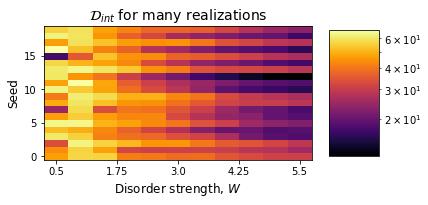

In [4]:
plot_2nn_imshow(ID[-1], ws)
plt.show()

### C. Averaging
By performing 2NN on eigenvectors from many disorder strengths and averaging across many realization, we obtain a general trend. 

We can improve results by including a weight when averaging. The weight is determined by the quality of individual 2NN fits.

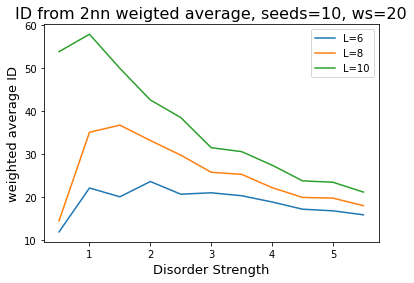

In [5]:
ID_avgs = np.average(ID, axis=1, weights=1/chi2)
plot_2nn_avgs(ID_avgs, Ls, ws, num_seeds)
plt.show()

### D. Scaling collapse
To obtain the critical disorder strength, we may collapse our data from different L's
see: https://pyfssa.readthedocs.io/en/stable/tutorial.html

autoscale done
Scale data done
criticality: $W_c=$ 4.257960664362278 $\pm$ 0.7425903877774798


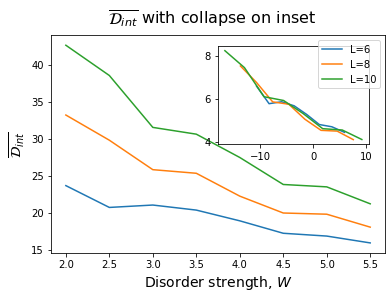

In [6]:
res = scale_collapse2(ID_avgs, ws, Ls=Ls, skip_initial=3)
print('criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))

## 4. Data from cluster

In [7]:
location_cluster = 'data/cluster/'
ws_cluster = np.linspace(0.1,6.1,31)
filename = location_cluster+'2nn-{}-combined.npy'.format(14)
data = np.load(filename)

### A. Many

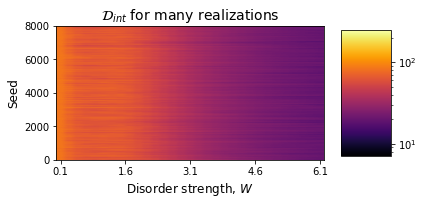

In [8]:
plot_2nn_imshow(data, ws_cluster)

### B. Scaling collapse

autoscale done
Scale data done


skip= 7 criticality: $W_c=$ 3.6517548433076086 $\pm$ 0.21975637931388842


           dnu: 0.13813234802592705
          drho: 0.21975637931388842
         dzeta: 0.5620954809022768
        errors: array([0.21975638, 0.13813235, 0.56209548])
 final_simplex: (array([[3.65175484, 1.86900897, 1.91551109],
       [3.65029014, 1.86823051, 1.91261186],
       [3.65112097, 1.86898095, 1.91365492],
       [3.65153958, 1.86923832, 1.91257111]]), array([60.72820494, 60.73164984, 60.73540668, 60.73657078]))
           fun: 60.728204935786614
       message: 'Optimization terminated successfully.'
          nfev: 77
           nit: 38
            nu: 1.8690089739302957
           rho: 3.6517548433076086
        status: 0
       success: True
         varco: array([[ 0.04829287,  0.03017103, -0.12065894],
       [ 0.03017103,  0.01908055, -0.07373735],
       [-0.12065894, -0.07373735,  0.31595133]])
             x: array([3.65175484, 1.86900897, 1.91551109])
          zeta: 1.9155110855464819

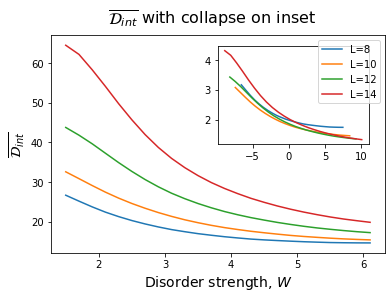

In [10]:

ws_cluster = np.linspace(0.1,6.1,31)
Ls_cluster = [8,10,12,14]
ID_mean = np.zeros((len(Ls_cluster),len(ws_cluster)))
ID_std = np.zeros((len(Ls_cluster),len(ws_cluster)))
ID_var = np.zeros((len(Ls_cluster),len(ws_cluster)))
#DATA = []
for index, L in enumerate(Ls_cluster):
    filename = location_cluster+'2nn-{}-combined.npy'.format(L)
    data = np.load(filename)
    #DATA.append(data)
    averaged = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    ID_mean[index] = averaged
    ID_std[index] = std
    ID_var[index] = np.var(data,axis=0)
    
skip_init = 7
res = scale_collapse2(ID_mean, ws_cluster, Ls_cluster, skip_initial=skip_init)
print('\n\nskip=',skip_init,'criticality: $W_c=$ {} $\pm$ {}'.format(res['rho'], res['drho']))
plt.savefig('figures/collapsed_skip{}.png'.format(skip_init), dpi=420)
res

In [10]:
res_dict = {}
skip_init_range = 9
for skip_init in range(skip_init_range):
    res = scale_collapse2(ID_mean, ws_cluster, Ls_cluster, skip_initial=skip_init)
    res_dict[skip_init] = res
    plt.close()


/opt/anaconda3/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done


/opt/anaconda3/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done
autoscale done
Scale data done


/opt/anaconda3/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done


/opt/anaconda3/lib/python3.8/site-packages/fssa/fssa.py:165: RuntimeWarning: rho_c is out of range
  warnings.warn("rho_c is out of range", RuntimeWarning)


autoscale done
Scale data done
autoscale done
Scale data done


/opt/anaconda3/lib/python3.8/site-packages/fssa/fssa.py:505: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(varco)), varco


autoscale done
Scale data done
autoscale done
Scale data done
autoscale done
Scale data done


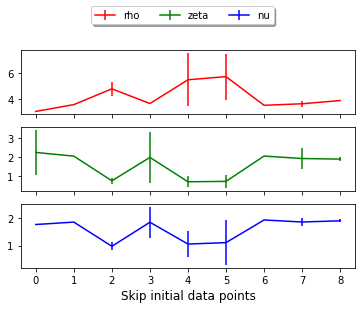

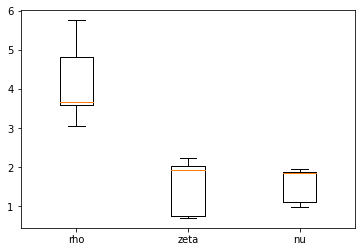

In [55]:
rho = [res_dict[i]['rho'] for i in range(skip_init_range)]
drho = [res_dict[i]['drho'] for i in range(skip_init_range)]
zeta = [res_dict[i]['zeta'] for i in range(skip_init_range)]
dzeta = [res_dict[i]['dzeta'] for i in range(skip_init_range)]
nu = [res_dict[i]['nu'] for i in range(skip_init_range)]
dnu = [res_dict[i]['dnu'] for i in range(skip_init_range)]

fig, ax = plt.subplots(3,1, sharex=True)

index=0
for y, yerr, label, color in zip([rho,zeta,nu],[drho,dzeta,dnu],'rho,zeta,nu'.split(','), 'r,g,b'.split(',')):
    ax[index].errorbar(range(skip_init_range), y, yerr=yerr, label=label, c=color) 
    #ax[index].legend()
    index+=1
fig.legend(labels='rho,zeta,nu'.split(','),loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Skip initial data points', fontsize = 12)
plt.show()

plt.figure()
plt.boxplot(np.vstack([rho,zeta,nu]).T)
plt.xticks(range(1,4), 'rho,zeta,nu'.split(','))
plt.show()

## Plateauing

{6: 2000, 8: 1000, 10: 200, 'W': 10, 'seed': 42, 12: 20}


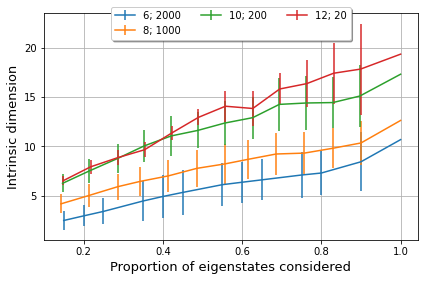

In [11]:
Ls = [6,8,10,12]

#plateau_dict = plateau(Ls = [6,8,10], W = 10, seed= 42,runs_lst = [100,50,10])
#np.savez('plateauing_dict_{}-{}.npz'.format(min(Ls), max(Ls)),plateau_dict)

file = np.load('plateauing_dict_{}-{}.npz'.format(min(Ls), max(Ls)), allow_pickle=True)
plateau_dict = file[file.files[0]].item()

params = plot_plateau(plateau_dict)
print(params)
plt.show()
